In [3]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
# Load the MFCC features dataset
data = pd.read_csv("RAVTESS_MFCC_Observed.csv")

# Display first few rows to confirm structure
print(data.head())

   Unnamed: 0           0          1          2          3          4  \
0        2004 -448.616730  46.947720 -15.431408  14.031242   3.960403   
1         148 -447.181396  22.572617 -34.142075  10.035789 -15.611120   
2        1774 -498.796722  40.586605  -6.478677   4.476108  -7.414015   
3        1494 -767.249756  71.167816  11.270552  25.242451   8.311923   
4        1567 -513.401672  56.673897 -15.300966  10.099506  -7.582697   

           5          6          7          8  ...        31        32  \
0   0.291582   0.338539   1.090663 -10.118276  ...  0.992721  2.206417   
1 -12.294549  -5.183321 -14.951354  -8.794611  ...  3.493344 -4.002779   
2  -1.774493 -13.756873  -0.302153 -12.894083  ...  2.280825  3.087717   
3  11.256550  -4.271712  -0.281539  -4.234643  ... -1.557784 -2.194302   
4  -9.510823 -13.405409 -16.025616 -11.858650  ...  2.418319  2.085466   

         33        34        35        36        37        38        39  \
0  1.096860  0.294669  0.372524  2.247855

In [5]:
# Separate features and labels
X = data.drop(['emotion'], axis=1)
y = data['emotion']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)



Accuracy: 74.75%
Classification Report:
               precision    recall  f1-score   support

       angry       0.79      0.86      0.83        74
        calm       0.72      0.94      0.82        78
     disgust       0.66      0.57      0.61        44
        fear       0.73      0.68      0.70        65
       happy       0.71      0.76      0.74        68
     neutral       0.90      0.72      0.80        39
         sad       0.78      0.66      0.72        80
   surprised       0.72      0.65      0.68        43

    accuracy                           0.75       491
   macro avg       0.75      0.73      0.74       491
weighted avg       0.75      0.75      0.74       491



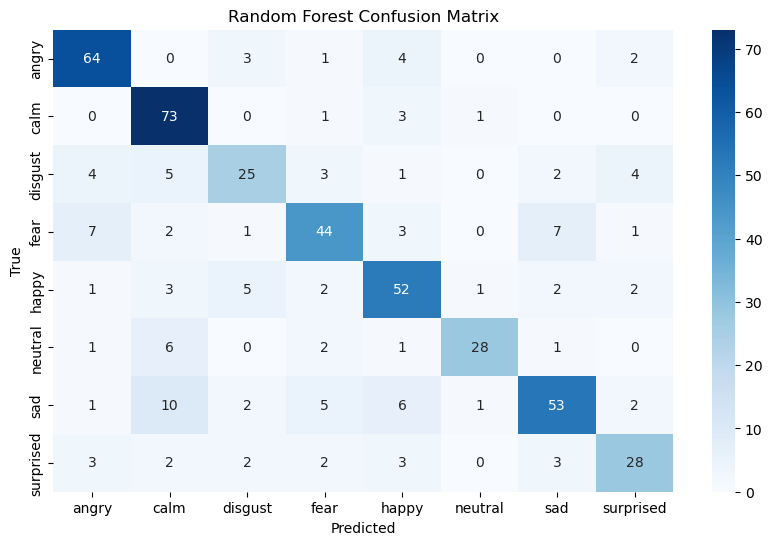

In [7]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100  # convert to percentage
print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()